# 4 - Edge builder test

This notebook is using the final edge builder function from `src/functions.py` to build the edges for testing purposes. The full graph with the edges is plotted using matplotlib.

In [1]:
import numpy as np
import awkward as ak
import uproot
import src.functions as fn

In [2]:
filename = "ntuples_13723003_0.root"
file = uproot.open(filename)

In [3]:
tracksters = file["ticlNtuplizer/tracksters"]

In [4]:
vertices_indexes = tracksters['vertices_indexes'].array()
vertices_x = tracksters['vertices_x'].array()
vertices_y = tracksters['vertices_y'].array()
vertices_z = tracksters['vertices_z'].array()
vertices_E = tracksters['vertices_energy'].array()

In [5]:
vertices_indexes_0 = vertices_indexes[0]
vertices_x_0 = vertices_x[0]
vertices_y_0 = vertices_y[0]
vertices_z_0 = vertices_z[0]
vertices_E_0 = vertices_E[0]

In [6]:
edges_0 = fn.edgeBuilderNNTr(
    vertices_indexes_0, 
    vertices_x_0, 
    vertices_y_0, 
    vertices_z_0, 
    vertices_E_0
)

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import cm

<IPython.core.display.Javascript object>


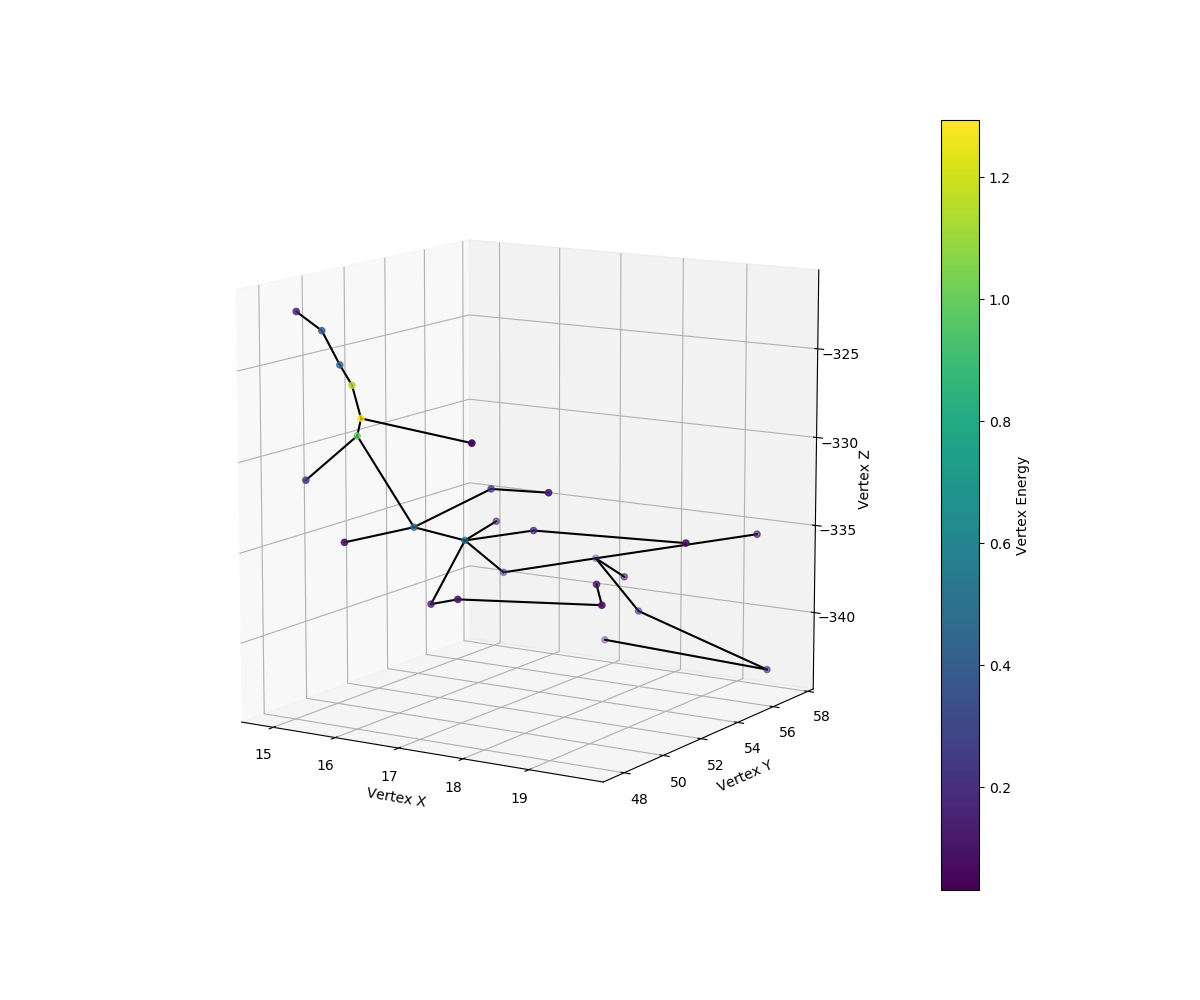

In [9]:
%matplotlib notebook
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Vertex X')
ax.set_ylabel('Vertex Y')
ax.set_zlabel('Vertex Z')
colmap = cm.ScalarMappable(cmap=cm.viridis)    

colmap.set_array(vertices_E_0[0])
yg = ax.scatter(
    vertices_x_0[0], 
    vertices_y_0[0], 
    vertices_z_0[0], 
    c=cm.viridis(vertices_E_0[0]/max(vertices_E_0[0])), 
    marker='o'
)
cb = fig.colorbar(colmap,label='Vertex Energy')

for ied in edges_0[0]:
    idx0 = ak.where(vertices_indexes_0[0] == ied.to_list()[0])[0][0]
    idx1 = ak.where(vertices_indexes_0[0] == ied.to_list()[1])[0][0]
    ax.plot(
        [vertices_x_0[0, idx0] ,vertices_x_0[0, idx1]],
        [vertices_y_0[0, idx0] ,vertices_y_0[0, idx1]],
        [vertices_z_0[0, idx0] ,vertices_z_0[0, idx1]],
        'black'
    )
plt.show()